In [1]:
import pandas as pd

df_bcn = pd.read_csv(r"C:\Users\maria\Downloads\cleaned_barcelona_weather.csv")
df_sto = pd.read_csv(r"C:\Users\maria\Downloads\cleaned_stockholm_weather.csv")

df_bcn['city'] = 'Barcelona'
df_sto['city'] = 'Stockholm'

df_merged = pd.concat([df_bcn, df_sto], ignore_index=True)
df_merged['datetime'] = pd.to_datetime(df_merged['datetime'])

df_merged.to_csv(r"C:\Users\maria\Downloads\merged_weather.csv", index=False)
print("✅ Merged dataset saved to Downloads!")

✅ Merged dataset saved to Downloads!


In [2]:
import pandas as pd

# Load merged dataset
df = pd.read_csv(r"C:\Users\maria\Downloads\merged_weather.csv")

# Preview
print(df.shape)
print(df['city'].value_counts())
df.head()

(4384, 20)
city
Barcelona    2192
Stockholm    2192
Name: count, dtype: int64


,datetime,temp,humidity,precip,windgust,windspeed,cloudcover,visibility,solarradiation,solarenergy,uvindex,city,tempmax,tempmin,feelslikemax,feelslikemin,feelslike,precipprob,snow,conditions
0,2019-01-01,8.8,76.3,0.0,21.2,16.5,22.3,15.6,76.7,6.4,4.0,Barcelona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-02,7.3,67.7,0.0,24.4,20.2,5.8,16.4,80.4,6.8,4.0,Barcelona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-03,5.8,72.7,0.0,20.5,17.9,5.6,15.0,79.5,6.8,4.0,Barcelona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-04,5.3,74.7,0.0,21.2,16.5,19.9,13.4,74.0,6.4,4.0,Barcelona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-05,6.8,66.9,0.0,25.9,16.8,11.3,13.1,81.9,7.0,4.0,Barcelona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print("Nulls:\n", df.isnull().sum())
print("\n Duplicates:", df.duplicated().sum())

Nulls:
 datetime             0
temp                 0
humidity             0
precip               0
windgust          1827
windspeed            0
cloudcover           0
visibility           0
solarradiation    1827
solarenergy       1827
uvindex              0
city                 0
tempmax           2557
tempmin           2557
feelslikemax      2557
feelslikemin      2557
feelslike         2557
precipprob        2557
snow              2557
conditions        2557
dtype: int64

 Duplicates: 0


In [4]:
# 1. Check all column names
print(df_bcn.columns)

# 2. Drop any duplicate 'datetime' columns except the first
df_bcn = df_bcn.loc[:, ~df_bcn.columns.duplicated()]

# 3. Ensure 'datetime' is a datetime type
df_bcn["datetime"] = pd.to_datetime(df_bcn["datetime"])

# 4. Create a new column with only the date part
df_bcn["date"] = df_bcn["datetime"].dt.date

# 5. Group by date and average numeric columns
df_bcn = df_bcn.groupby("date").mean(numeric_only=True).reset_index()

# 6. Rename 'date' back to 'datetime' and convert it to datetime
df_bcn.rename(columns={"date": "datetime"}, inplace=True)
df_bcn["datetime"] = pd.to_datetime(df_bcn["datetime"])

# 7. Final confirmation
print(df_bcn.shape)
print(df_bcn["datetime"].min(), "to", df_bcn["datetime"].max())

Index(['datetime', 'temp', 'humidity', 'precip', 'windgust', 'windspeed',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'city'],
      dtype='object')
(2192, 11)
2019-01-01 00:00:00 to 2024-12-31 00:00:00


In [5]:
df_bcn["datetime"] = pd.to_datetime(df_bcn["datetime"])
df_sto["datetime"] = pd.to_datetime(df_sto["datetime"])

print("Barcelona frequency sample:", df_bcn["datetime"].diff().value_counts().head())
print("Stockholm frequency sample:", df_sto["datetime"].diff().value_counts().head())

Barcelona frequency sample: datetime
1 days    2191
Name: count, dtype: int64
Stockholm frequency sample: datetime
1 days    2191
Name: count, dtype: int64


In [6]:
df_bcn.to_csv("C:/Users/maria/Downloads/cleaned_barcelona_weather.csv", index=False)


In [7]:
df_bcn["city"] = "Barcelona"
df_sto["city"] = "Stockholm"

merged = pd.concat([df_bcn, df_sto], ignore_index=True)
merged.to_csv("C:/Users/maria/Downloads/merged_weather.csv", index=False)

In [8]:
merged = pd.read_csv("C:/Users/maria/Downloads/merged_weather.csv")
print(merged["city"].value_counts())
print(merged.head())

city
Barcelona    2192
Stockholm    2192
Name: count, dtype: int64
     datetime  temp  humidity  precip  windgust  windspeed  cloudcover  \
0  2019-01-01   8.8      76.3     0.0      21.2       16.5        22.3   
1  2019-01-02   7.3      67.7     0.0      24.4       20.2         5.8   
2  2019-01-03   5.8      72.7     0.0      20.5       17.9         5.6   
3  2019-01-04   5.3      74.7     0.0      21.2       16.5        19.9   
4  2019-01-05   6.8      66.9     0.0      25.9       16.8        11.3   

   visibility  solarradiation  solarenergy  uvindex       city  tempmax  \
0        15.6            76.7          6.4      4.0  Barcelona      NaN   
1        16.4            80.4          6.8      4.0  Barcelona      NaN   
2        15.0            79.5          6.8      4.0  Barcelona      NaN   
3        13.4            74.0          6.4      4.0  Barcelona      NaN   
4        13.1            81.9          7.0      4.0  Barcelona      NaN   

   tempmin  feelslikemax  feelslikemi

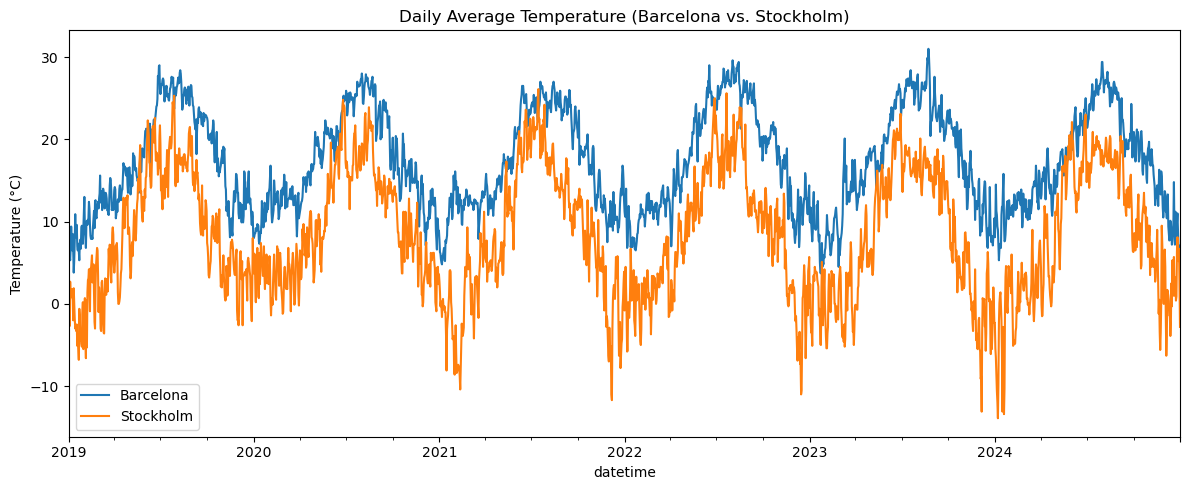

In [9]:
import matplotlib.pyplot as plt

merged["datetime"] = pd.to_datetime(merged["datetime"])

# Temperature over time by city
plt.figure(figsize=(12, 5))
for city in merged["city"].unique():
    merged[merged["city"] == city].set_index("datetime")["temp"].plot(label=city)

plt.title("Daily Average Temperature (Barcelona vs. Stockholm)")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
print(df.groupby("city")["datetime"].min())

city
Barcelona    2019-01-01
Stockholm    2019-01-01
Name: datetime, dtype: object


In [11]:
df[(df["city"] == "Stockholm") & (df["datetime"] < "2020-01-01")]

,datetime,temp,humidity,precip,windgust,windspeed,cloudcover,visibility,solarradiation,solarenergy,uvindex,city,tempmax,tempmin,feelslikemax,feelslikemin,feelslike,precipprob,snow,conditions
2192,2019-01-01,3.9,82.4,0.464,54.4,34.5,66.9,25.1,8.1,0.7,1.0,Stockholm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2193,2019-01-02,-1.1,64.9,0.296,83.3,46.6,68.8,24.6,6.8,0.7,0.0,Stockholm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2194,2019-01-03,-2.7,83.5,0.687,25.6,12.9,46.3,27.1,8.7,0.7,1.0,Stockholm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2195,2019-01-04,2.7,87.2,1.637,26.7,18.5,83.8,24.8,4.8,0.5,0.0,Stockholm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2196,2019-01-05,0.8,90.0,0.171,27.3,15.6,52.3,25.1,10.3,0.9,1.0,Stockholm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2019-12-27,-0.8,81.8,0.057,40.6,20.7,65.6,26.9,6.4,0.5,0.0,Stockholm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2553,2019-12-28,-2.1,85.4,0.312,21.6,13.6,53.9,26.4,8.7,0.8,1.0,Stockholm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2554,2019-12-29,2.3,89.0,0.000,45.9,25.9,94.2,20.3,2.0,0.0,0.0,Stockholm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2555,2019-12-30,8.0,82.9,0.000,51.8,30.3,70.7,18.1,4.4,0.3,0.0,Stockholm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


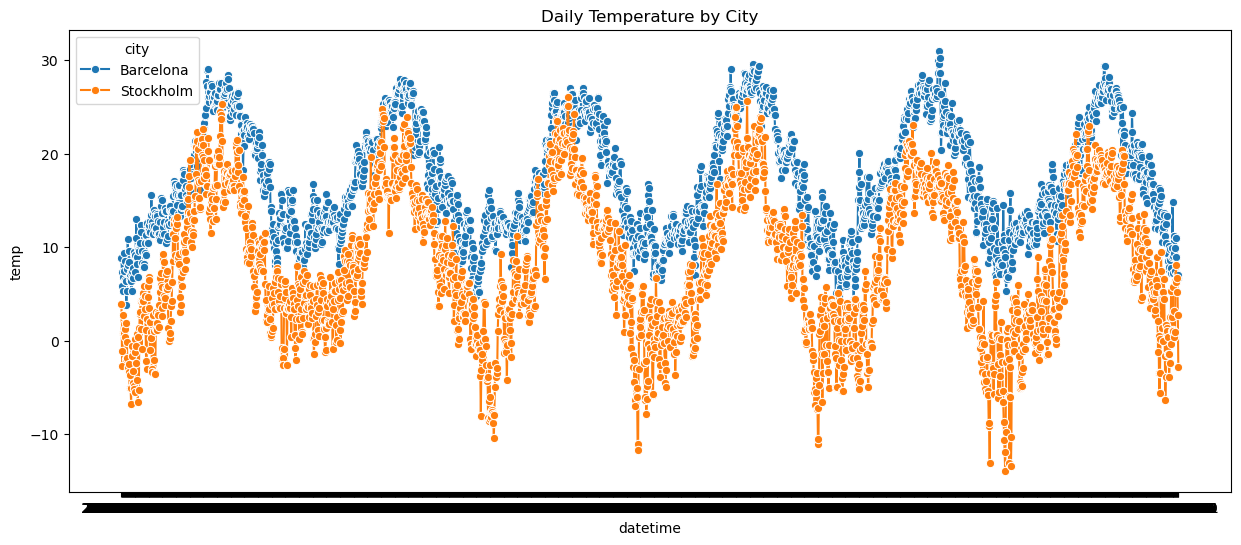

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x="datetime", y="temp", hue="city", marker="o")
plt.title("Daily Temperature by City")
plt.show()

In [13]:
df.isnull().groupby(df["city"]).sum()

,datetime,temp,humidity,precip,windgust,windspeed,cloudcover,visibility,solarradiation,solarenergy,uvindex,city,tempmax,tempmin,feelslikemax,feelslikemin,feelslike,precipprob,snow,conditions
city,,,,,,,,,,,,,,,,,,,,
Barcelona,0,0,0,0,0,0,0,0,0,0,0,0,2192,2192,2192,2192,2192,2192,2192,2192
Stockholm,0,0,0,0,1827,0,0,0,1827,1827,0,0,365,365,365,365,365,365,365,365


In [14]:
df.drop(columns=["solarradiation", "solarenergy", "windgust"], inplace=True)

In [15]:
print("Nulls after cleaning:\n", df.isnull().sum())

Nulls after cleaning:
 datetime           0
temp               0
humidity           0
precip             0
windspeed          0
cloudcover         0
visibility         0
uvindex            0
city               0
tempmax         2557
tempmin         2557
feelslikemax    2557
feelslikemin    2557
feelslike       2557
precipprob      2557
snow            2557
conditions      2557
dtype: int64


In [16]:
df.drop(columns=[
    "tempmax", "tempmin",
    "feelslikemax", "feelslikemin", "feelslike",
    "precipprob", "snow", "conditions"
], inplace=True)

In [17]:
print("✅ Remaining nulls:\n", df.isnull().sum())

✅ Remaining nulls:
 datetime      0
temp          0
humidity      0
precip        0
windspeed     0
cloudcover    0
visibility    0
uvindex       0
city          0
dtype: int64


In [18]:
print("Nulls:\n", df.isnull().sum())
print("\n Duplicates:", df.duplicated().sum())

Nulls:
 datetime      0
temp          0
humidity      0
precip        0
windspeed     0
cloudcover    0
visibility    0
uvindex       0
city          0
dtype: int64

 Duplicates: 0


In [19]:
print(df.dtypes)

# Optional: check if all numeric columns are really numeric
numeric_columns = df.select_dtypes(include='number').columns
print("\n All numeric columns:", numeric_columns.tolist())

print("\n Non-numeric rows in numeric columns:")
print(df[numeric_columns].applymap(lambda x: isinstance(x, str)).sum())

datetime       object
temp          float64
humidity      float64
precip        float64
windspeed     float64
cloudcover    float64
visibility    float64
uvindex       float64
city           object
dtype: object

 All numeric columns: ['temp', 'humidity', 'precip', 'windspeed', 'cloudcover', 'visibility', 'uvindex']

 Non-numeric rows in numeric columns:
temp          0
humidity      0
precip        0
windspeed     0
cloudcover    0
visibility    0
uvindex       0
dtype: int64


C:\Users\maria\AppData\Local\Temp\ipykernel_7920\2202317190.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df[numeric_columns].applymap(lambda x: isinstance(x, str)).sum())


In [20]:
print("Temperature over 60°C:\n", df[df["temp"] > 60])
print("\n Humidity above 100%:\n", df[df["humidity"] > 100])

Temperature over 60°C:
 Empty DataFrame
Columns: [datetime, temp, humidity, precip, windspeed, cloudcover, visibility, uvindex, city]
Index: []

 Humidity above 100%:
 Empty DataFrame
Columns: [datetime, temp, humidity, precip, windspeed, cloudcover, visibility, uvindex, city]
Index: []


In [21]:
print("Datetime type:", df["datetime"].dtype)
print("Date range:", df["datetime"].min(), "to", df["datetime"].max())
print("Duplicated datetimes:", df["datetime"].duplicated().sum())

Datetime type: object
Date range: 2019-01-01 to 2024-12-31
Duplicated datetimes: 2192


In [22]:
print("Cities in dataset:", df["city"].unique())

Cities in dataset: ['Barcelona' 'Stockholm']


In [23]:
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")

In [24]:
print("Conversion errors (NaT):", df["datetime"].isna().sum())

Conversion errors (NaT): 0


In [25]:
dupes = df.duplicated(subset=["city", "datetime"])
print("Duplicate rows per city-date:", dupes.sum())

Duplicate rows per city-date: 0


In [26]:
df = df.drop_duplicates(subset=["city", "datetime"], keep="first")

In [27]:
print("Datetime dtype:", df["datetime"].dtype)
print("Datetime range:", df["datetime"].min(), "to", df["datetime"].max())
print("Duplicates after cleaning:", df.duplicated(subset=["city", "datetime"]).sum())

Datetime dtype: datetime64[ns]
Datetime range: 2019-01-01 00:00:00 to 2024-12-31 00:00:00
Duplicates after cleaning: 0


In [28]:
df.to_csv("cleaned_weather_bcn_sto.csv", index=False)

In [29]:
# Basic info
print("DataFrame shape:", df.shape)
print("\n Data Types:")
print(df.dtypes)

# Peek at data
df.head()

DataFrame shape: (4384, 9)

 Data Types:
datetime      datetime64[ns]
temp                 float64
humidity             float64
precip               float64
windspeed            float64
cloudcover           float64
visibility           float64
uvindex              float64
city                  object
dtype: object


,datetime,temp,humidity,precip,windspeed,cloudcover,visibility,uvindex,city
0,2019-01-01,8.8,76.3,0.0,16.5,22.3,15.6,4.0,Barcelona
1,2019-01-02,7.3,67.7,0.0,20.2,5.8,16.4,4.0,Barcelona
2,2019-01-03,5.8,72.7,0.0,17.9,5.6,15.0,4.0,Barcelona
3,2019-01-04,5.3,74.7,0.0,16.5,19.9,13.4,4.0,Barcelona
4,2019-01-05,6.8,66.9,0.0,16.8,11.3,13.1,4.0,Barcelona


In [30]:
print("Record count per city:")
print(df["city"].value_counts())

Record count per city:
city
Barcelona    2192
Stockholm    2192
Name: count, dtype: int64


In [31]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
datetime,4384,2021-12-31 12:00:00,2019-01-01 00:00:00,2020-07-01 18:00:00,2021-12-31 12:00:00,2023-07-02 06:00:00,2024-12-31 00:00:00,NaN
temp,4384.0,12.793476,-13.9,7.0,13.0,18.8,31.0,8.224805
humidity,4384.0,73.288047,30.0,64.8,74.1,82.7,99.0,12.524565
precip,4384.0,1.554905,0.0,0.0,0.0,0.49925,145.107,6.057474
windspeed,4384.0,21.006775,3.6,16.5,20.2,24.5,69.0,6.523752
cloudcover,4384.0,46.508942,0.0,27.1,43.5,66.4,100.0,26.376184
visibility,4384.0,16.384398,0.5,12.3,15.2,17.8,36.7,6.048277
uvindex,4384.0,4.813869,0.0,3.0,5.0,7.0,10.0,2.723141


In [32]:
df.groupby("city")["datetime"].agg(["min", "max"])

,min,max
city,,
Barcelona,2019-01-01,2024-12-31
Stockholm,2019-01-01,2024-12-31


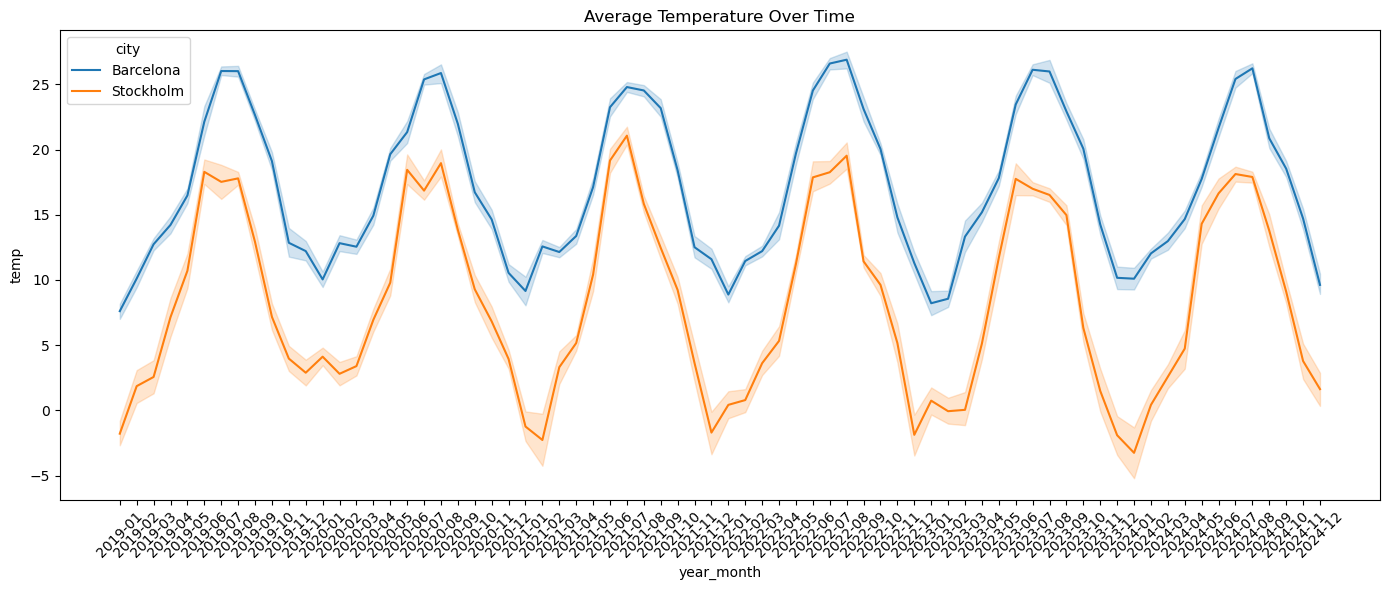

In [33]:
# Average temperature per month
df["year_month"] = df["datetime"].dt.to_period("M").astype(str)

plt.figure(figsize=(14,6))
sns.lineplot(data=df, x="year_month", y="temp", hue="city")
plt.xticks(rotation=45)
plt.title("Average Temperature Over Time")
plt.tight_layout()
plt.show()

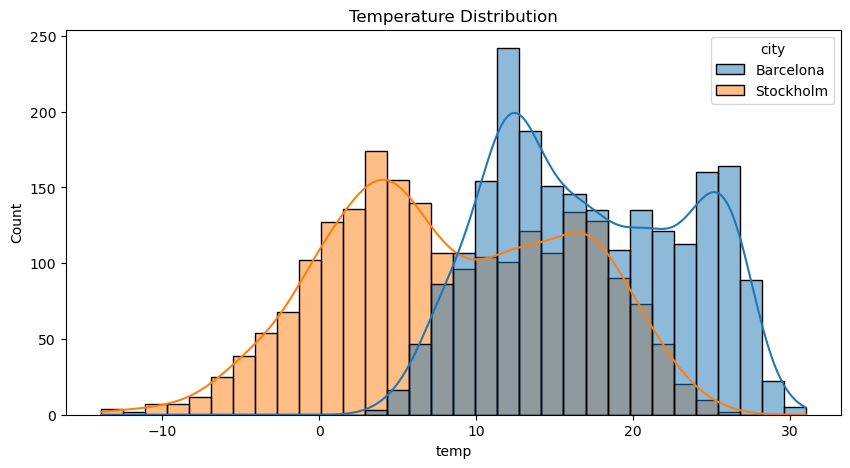

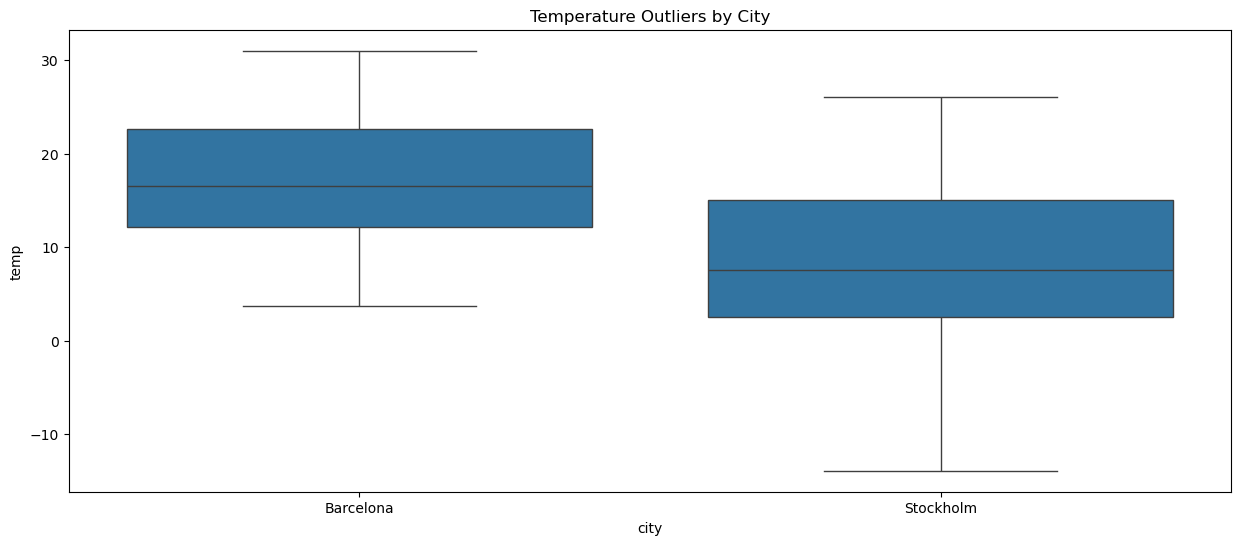

In [34]:
# Histogram for temperature
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="temp", hue="city", kde=True)
plt.title("Temperature Distribution")
plt.show()

# Boxplots for outlier check
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x="city", y="temp")
plt.title("Temperature Outliers by City")
plt.show()


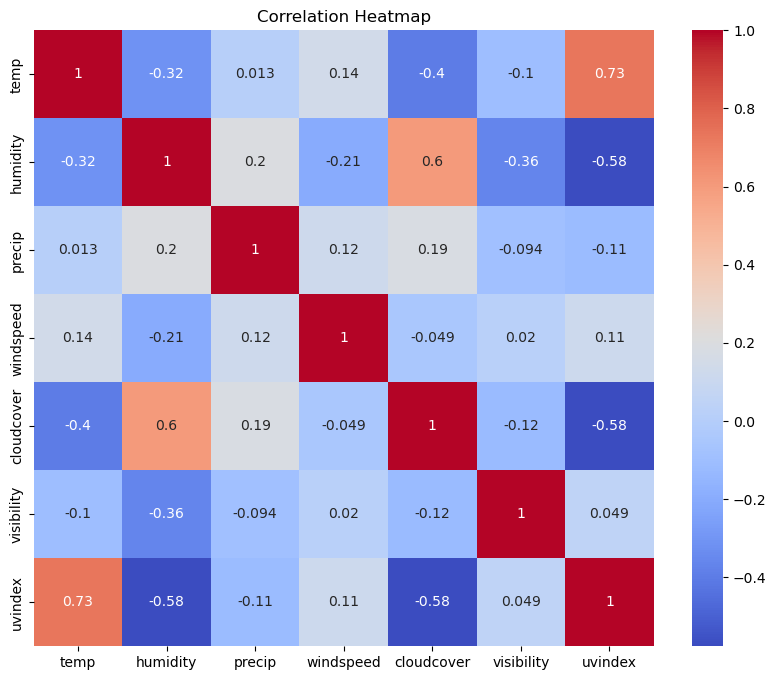

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [36]:
df.to_csv("final_weather_data.csv", index=False)

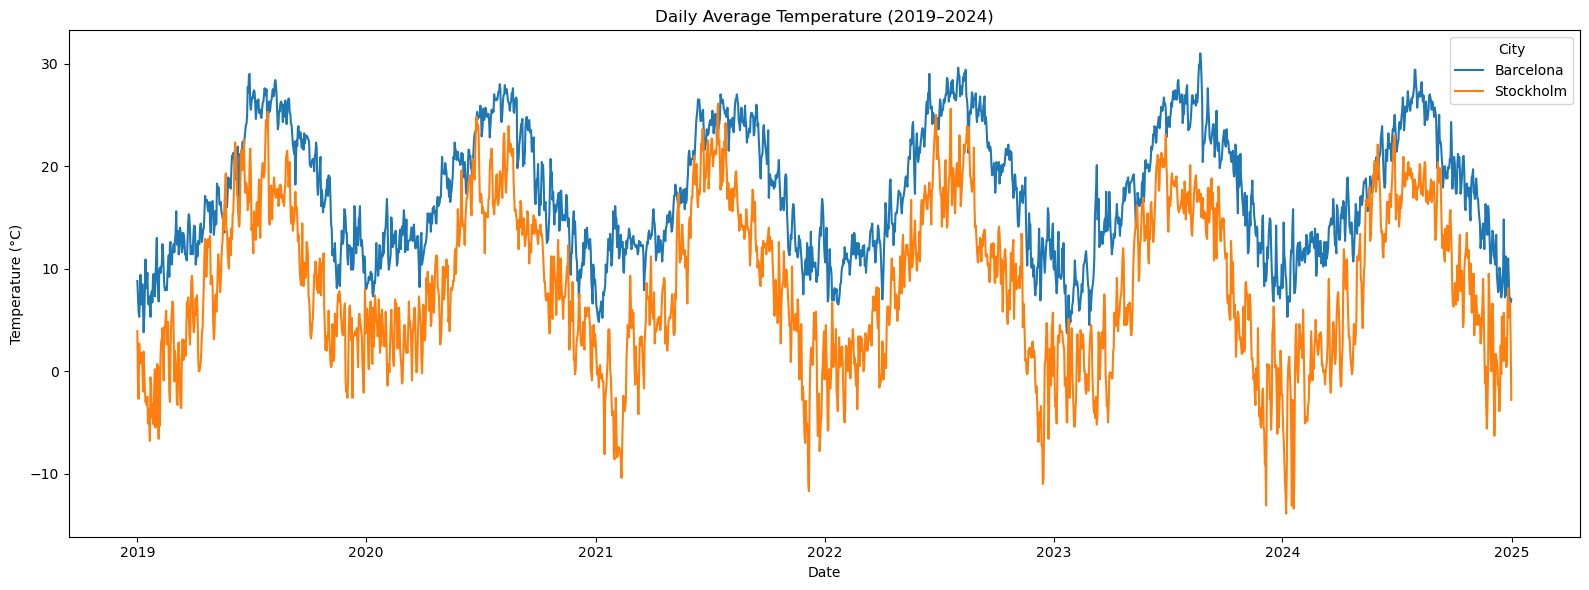

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert datetime column
df["datetime"] = pd.to_datetime(df["datetime"])

# Set datetime as index
df.set_index("datetime", inplace=True)

# Plot temperature trends
plt.figure(figsize=(16, 6))
sns.lineplot(data=df, x=df.index, y="temp", hue="city")
plt.title("Daily Average Temperature (2019–2024)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend(title="City")
plt.tight_layout()
plt.show()

df.reset_index(inplace=True)

In [38]:
df["datetime"] = pd.to_datetime(df["datetime"])

# Extract useful date features
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df["day_of_week"] = df["datetime"].dt.dayofweek

# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return "winter"
    elif month in [3, 4, 5]:
        return "spring"
    elif month in [6, 7, 8]:
        return "summer"
    else:
        return "autumn"

df["season"] = df["month"].apply(get_season)

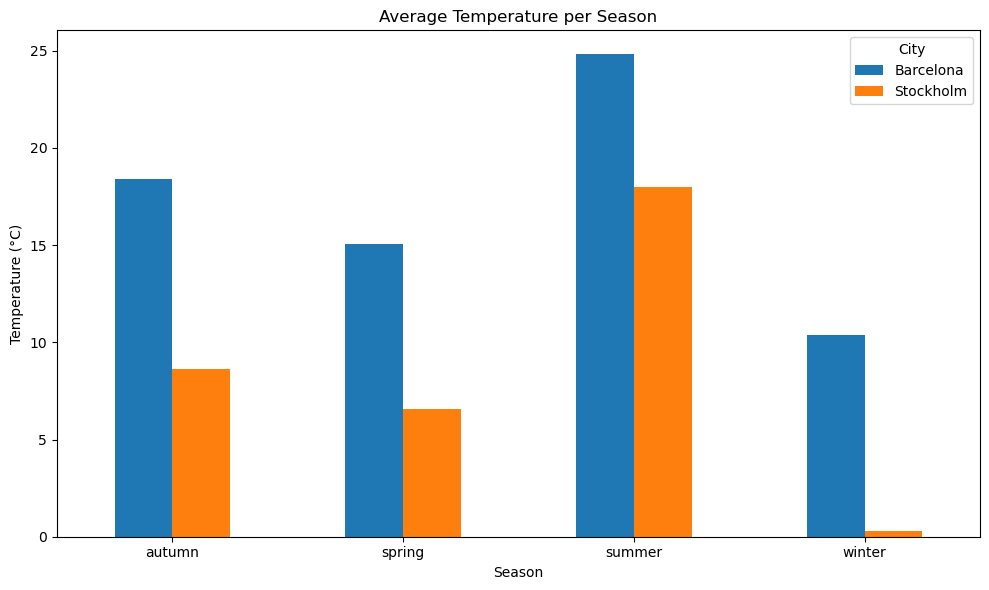

In [39]:
df.groupby(["city", "season"])["temp"].mean().unstack().T.plot(kind="bar", figsize=(10,6))
plt.title("Average Temperature per Season")
plt.ylabel("Temperature (°C)")
plt.xlabel("Season")
plt.xticks(rotation=0)
plt.legend(title="City")
plt.tight_layout()
plt.show()

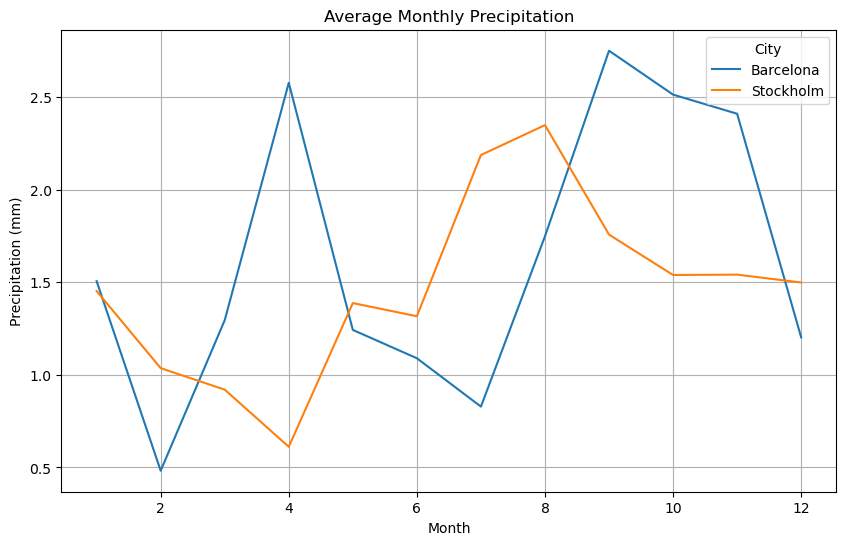

In [40]:
df.groupby(["city", "month"])["precip"].mean().unstack().T.plot(figsize=(10,6))
plt.title("Average Monthly Precipitation")
plt.ylabel("Precipitation (mm)")
plt.xlabel("Month")
plt.legend(title="City")
plt.grid(True)
plt.show()

In [41]:
df["temp_roll7"] = df.groupby("city")["temp"].transform(lambda x: x.rolling(7, min_periods=1).mean())

In [42]:
df['datetime'].dtype

dtype('<M8[ns]')

In [43]:
df['datetime'].head()

0   2019-01-01
1   2019-01-02
2   2019-01-03
3   2019-01-04
4   2019-01-05
Name: datetime, dtype: datetime64[ns]

In [44]:
for var_name in dir():
    if isinstance(eval(var_name), pd.DataFrame):
        print(var_name)

_11
_13
_2
_29
_31
_32
___
df
df_bcn
df_merged
df_sto
merged


In [45]:
df_merged.head()

,datetime,temp,humidity,precip,windgust,windspeed,cloudcover,visibility,solarradiation,solarenergy,uvindex,city,tempmax,tempmin,feelslikemax,feelslikemin,feelslike,precipprob,snow,conditions
0,2019-01-01,8.8,76.3,0.0,21.2,16.5,22.3,15.6,76.7,6.4,4.0,Barcelona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-02,7.3,67.7,0.0,24.4,20.2,5.8,16.4,80.4,6.8,4.0,Barcelona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-03,5.8,72.7,0.0,20.5,17.9,5.6,15.0,79.5,6.8,4.0,Barcelona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-04,5.3,74.7,0.0,21.2,16.5,19.9,13.4,74.0,6.4,4.0,Barcelona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-05,6.8,66.9,0.0,25.9,16.8,11.3,13.1,81.9,7.0,4.0,Barcelona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df_merged.to_csv("final_weather_data.csv", index=False)

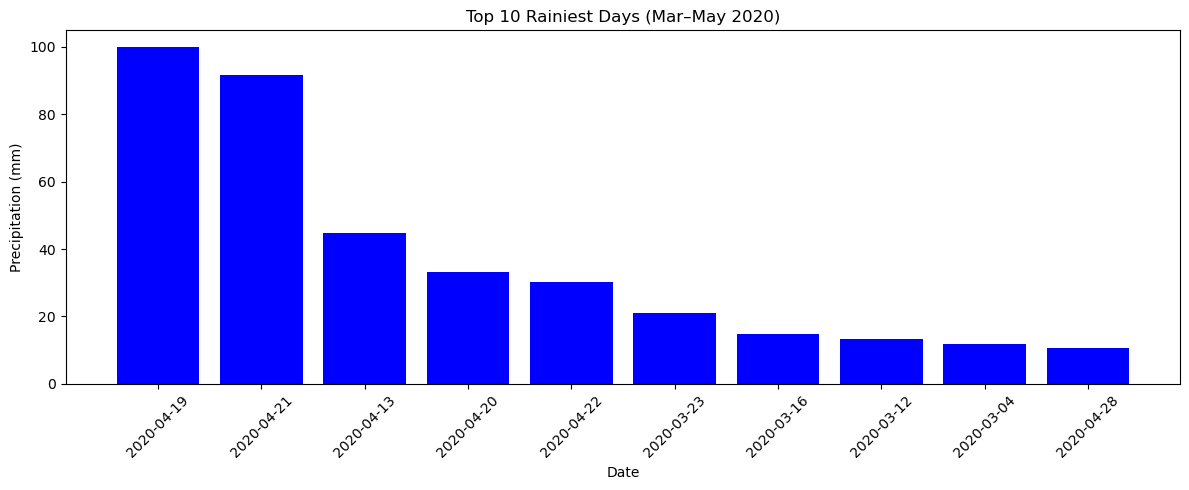

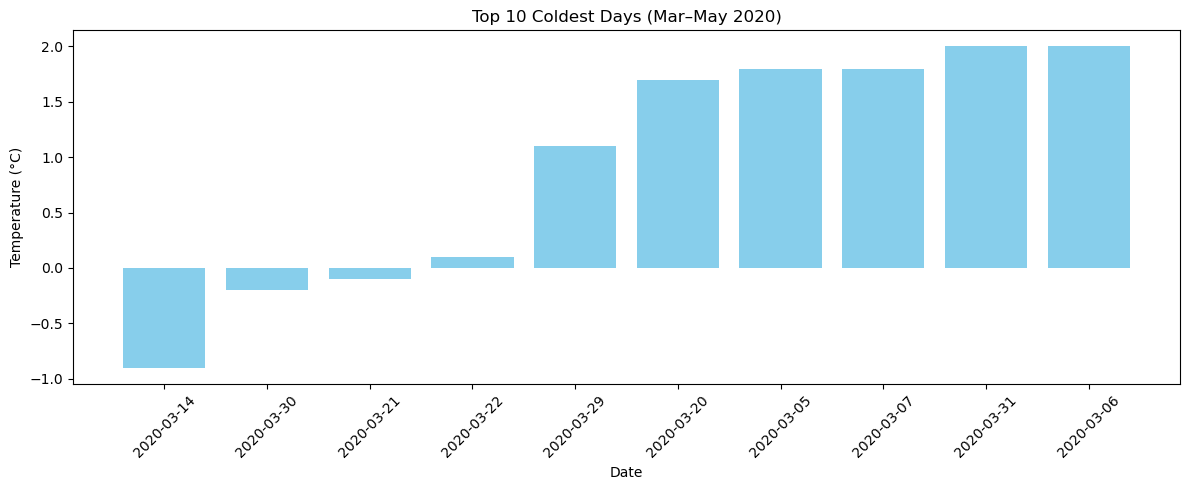

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter data to March–May 2020
mask = (df_merged['datetime'] >= '2020-03-01') & (df_merged['datetime'] <= '2020-05-31')
spring_2020 = df_merged[mask]

# Step 2: Sort by precip (rain) and temperature
top_rainy_days = spring_2020.sort_values(by='precip', ascending=False).head(10)
coldest_days = spring_2020.sort_values(by='temp', ascending=True).head(10)

# Step 3: Plot rainiest days
plt.figure(figsize=(12, 5))
plt.bar(top_rainy_days['datetime'].dt.strftime('%Y-%m-%d'), top_rainy_days['precip'], color='blue')
plt.xticks(rotation=45)
plt.title('Top 10 Rainiest Days (Mar–May 2020)')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.tight_layout()
plt.show()

# Step 4: Plot coldest days
plt.figure(figsize=(12, 5))
plt.bar(coldest_days['datetime'].dt.strftime('%Y-%m-%d'), coldest_days['temp'], color='skyblue')
plt.xticks(rotation=45)
plt.title('Top 10 Coldest Days (Mar–May 2020)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.tight_layout()
plt.show()

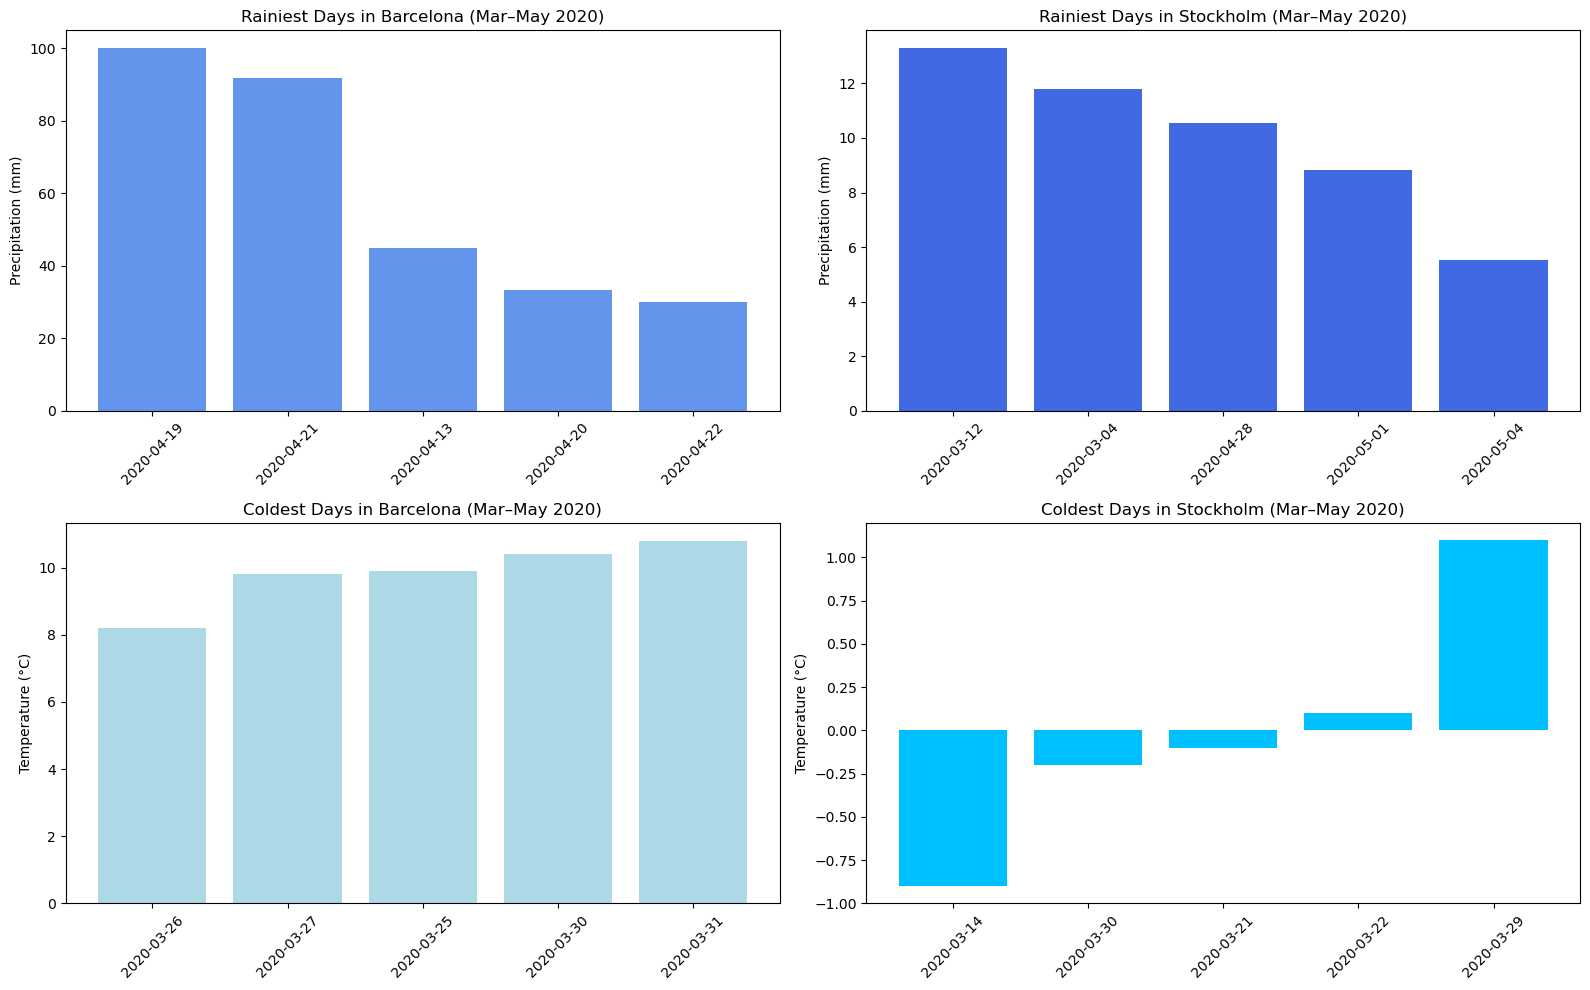

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter March–May 2020
mask = (df_merged['datetime'] >= '2020-03-01') & (df_merged['datetime'] <= '2020-05-31')
spring_2020 = df_merged[mask]

# Step 2: Split by city
spring_bcn = spring_2020[spring_2020['city'] == 'Barcelona']
spring_sto = spring_2020[spring_2020['city'] == 'Stockholm']

# Step 3: Top 5 rainiest & coldest days for each city
top_rain_bcn = spring_bcn.sort_values(by='precip', ascending=False).head(5)
top_rain_sto = spring_sto.sort_values(by='precip', ascending=False).head(5)

coldest_bcn = spring_bcn.sort_values(by='temp', ascending=True).head(5)
coldest_sto = spring_sto.sort_values(by='temp', ascending=True).head(5)

# Step 4: Plotting
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Rainiest - Barcelona
axs[0, 0].bar(top_rain_bcn['datetime'].dt.strftime('%Y-%m-%d'), top_rain_bcn['precip'], color='cornflowerblue')
axs[0, 0].set_title('Rainiest Days in Barcelona (Mar–May 2020)')
axs[0, 0].set_ylabel('Precipitation (mm)')
axs[0, 0].tick_params(axis='x', rotation=45)

# Rainiest - Stockholm
axs[0, 1].bar(top_rain_sto['datetime'].dt.strftime('%Y-%m-%d'), top_rain_sto['precip'], color='royalblue')
axs[0, 1].set_title('Rainiest Days in Stockholm (Mar–May 2020)')
axs[0, 1].set_ylabel('Precipitation (mm)')
axs[0, 1].tick_params(axis='x', rotation=45)

# Coldest - Barcelona
axs[1, 0].bar(coldest_bcn['datetime'].dt.strftime('%Y-%m-%d'), coldest_bcn['temp'], color='lightblue')
axs[1, 0].set_title('Coldest Days in Barcelona (Mar–May 2020)')
axs[1, 0].set_ylabel('Temperature (°C)')
axs[1, 0].tick_params(axis='x', rotation=45)

# Coldest - Stockholm
axs[1, 1].bar(coldest_sto['datetime'].dt.strftime('%Y-%m-%d'), coldest_sto['temp'], color='deepskyblue')
axs[1, 1].set_title('Coldest Days in Stockholm (Mar–May 2020)')
axs[1, 1].set_ylabel('Temperature (°C)')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [49]:
df.columns

Index(['datetime', 'temp', 'humidity', 'precip', 'windspeed', 'cloudcover',
       'visibility', 'uvindex', 'city', 'year_month', 'year', 'month', 'day',
       'day_of_week', 'season', 'temp_roll7'],
      dtype='object')